# Density Based Clustering (Flat/Partitional)

Density-based clustering works on the principle that clusters are dense regions of data points in space, which are separated by areas of lower point density. Unlike centroid-based methods that aim for spherical clusters, density-based clustering can discover clusters of arbitrary shapes and is robust to noise.

### DBSCAN (Most common)

Estimates the density by counting the number of points in a fixed-radius neigh
borhood and considers two points as connected if they lie within each other’s neighborhood. 

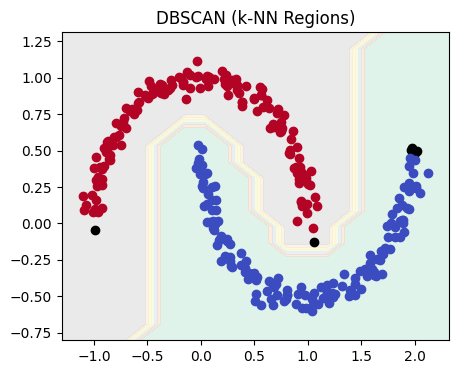

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply DBSCAN clustering
labels = DBSCAN(eps=0.23, min_samples=20).fit_predict(X)


# Create a grid for contour plotting
mask = labels != -1
knn = KNeighborsClassifier(n_neighbors=5).fit(X[mask], labels[mask])

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.2, X[:,0].max()+0.2, 20),np.linspace(X[:,1].min()-0.2, X[:,1].max()+0.2, 20))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, cmap="Pastel2", alpha=0.4)
cmap = plt.get_cmap('coolwarm', 2)

for l in np.unique(labels):
    color = 'k' if l == -1 else cmap(l)
    plt.scatter(*X[labels == l].T, c=[color])

plt.title("DBSCAN (k-NN Regions)")
plt.show()

### HDBSCAN

Estimates density similarly to DBSCAN but builds a hierarchy of clusters based on how density connectivity changes as the neighborhood size increases.
Clusters are extracted from this hierarchy by selecting the most stable (persistent) regions.
It doesn’t require a fixed radius like DBSCAN and is better at detecting clusters of varying densities.

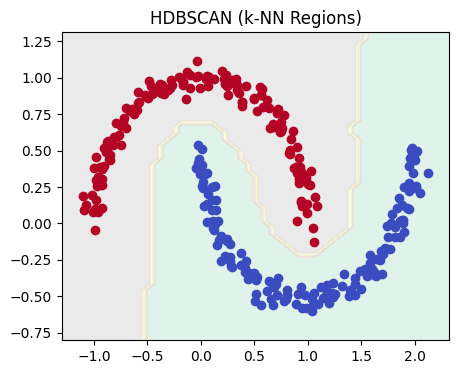

In [106]:
from sklearn.cluster import HDBSCAN

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply HDBSCAN clustering
labels = HDBSCAN(min_samples=10).fit_predict(X)

# Create a grid for contour plotting
mask = labels != -1
knn = KNeighborsClassifier(n_neighbors=5).fit(X[mask], labels[mask])

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.2, X[:,0].max()+0.2, 50),np.linspace(X[:,1].min()-0.2, X[:,1].max()+0.2, 50))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, cmap="Pastel2", alpha=0.4)
cmap = plt.get_cmap('coolwarm', 2)
for l in np.unique(labels):
    c = 'k' if l == -1 else cmap(l)
    plt.scatter(*X[labels == l].T, c=[c])
plt.title("HDBSCAN (k-NN Regions)")
plt.show()